In [335]:
import pandas as pd
import numpy as np

In [336]:
fashion_trainval = pd.read_csv("fashion_data_info_train_competition.csv")
fashion_trainval.shape
#fashion_trainval.head()

(275142, 8)

In [337]:
fashion_ref = pd.read_json("fashion_profile_train.json")
fashion_ref.head()

,Pattern,Collar Type,Fashion Trend,Clothing Material,Sleeves
basic,NaN,NaN,4.0,NaN,NaN
boat neck,NaN,6.0,NaN,NaN,NaN
bohemian,NaN,NaN,8.0,NaN,NaN
brocade,15.0,NaN,NaN,NaN,NaN
button down,NaN,9.0,NaN,NaN,NaN


In [338]:
fashion_ref["Attribute"] = fashion_ref.index
fashion_ref.head()

,Pattern,Collar Type,Fashion Trend,Clothing Material,Sleeves,Attribute
basic,NaN,NaN,4.0,NaN,NaN,basic
boat neck,NaN,6.0,NaN,NaN,NaN,boat neck
bohemian,NaN,NaN,8.0,NaN,NaN,bohemian
brocade,15.0,NaN,NaN,NaN,NaN,brocade
button down,NaN,9.0,NaN,NaN,NaN,button down


In [339]:
fashion_trainval = pd.merge(fashion_trainval, fashion_ref.loc[~np.isnan(fashion_ref["Pattern"]), 
                                                              ["Pattern","Attribute"]],
                            on="Pattern", how="left")
fashion_trainval = fashion_trainval.rename(columns={"Attribute":"Pattern_Attr"})
fashion_trainval = pd.merge(fashion_trainval, fashion_ref.loc[~np.isnan(fashion_ref["Collar Type"]), 
                                                              ["Collar Type","Attribute"]],
                            on="Collar Type", how="left")
fashion_trainval = fashion_trainval.rename(columns={"Attribute":"Collar_Type_Attr"})
fashion_trainval = pd.merge(fashion_trainval, fashion_ref.loc[~np.isnan(fashion_ref["Fashion Trend"]), 
                                                              ["Fashion Trend","Attribute"]],
                            on="Fashion Trend", how="left")
fashion_trainval = fashion_trainval.rename(columns={"Attribute":"Fashion_Trend_Attr"})
fashion_trainval = pd.merge(fashion_trainval, fashion_ref.loc[~np.isnan(fashion_ref["Clothing Material"]), 
                                                              ["Clothing Material","Attribute"]],
                            on="Clothing Material", how="left")
fashion_trainval = fashion_trainval.rename(columns={"Attribute":"Clothing_Material_Attr"})
fashion_trainval = pd.merge(fashion_trainval, fashion_ref.loc[~np.isnan(fashion_ref["Sleeves"]), 
                                                              ["Sleeves","Attribute"]],
                            on="Sleeves", how="left")
fashion_trainval = fashion_trainval.rename(columns={"Attribute":"Sleeves_Attr"})
fashion_trainval.head()

,itemid,title,image_path,Pattern,Collar Type,Fashion Trend,Clothing Material,Sleeves,Pattern_Attr,Collar_Type_Attr,Fashion_Trend_Attr,Clothing_Material_Attr,Sleeves_Attr
0,2282553,retro floral dress,fashion_image/78d17fdb159bba51a4250dc3d583245e,2.0,NaN,3.0,NaN,NaN,floral,NaN,retro vintage,NaN,NaN
1,13822218,dress floral sifon,fashion_image/2f77dac9965bbfdb03cbd3724b3552c5,2.0,NaN,NaN,4.0,NaN,floral,NaN,NaN,chiffon,NaN
2,33555935,korean white chiffon collar dress,fashion_image/6dbe2e7cba5ddbb750d2144d8f248f11,NaN,13.0,10.0,4.0,NaN,NaN,polo,korean,chiffon,NaN
3,65755120,women s trendy apricot o neck solid chiffon bl...,fashion_image/dc9b21429604148fc0342d12694f3294,NaN,3.0,NaN,4.0,NaN,NaN,o neck,NaN,chiffon,NaN
4,65857438,big sale baju gamis pesta india aysilla pancar...,fashion_image/6c25c578dd8edce742a805f891f1a51f,NaN,NaN,6.0,17.0,NaN,NaN,NaN,party,jersey,NaN


In [340]:
# replace nan with default
fashion_trainval = fashion_trainval.fillna("default")

In [341]:
fashion_trainval["Label"] = fashion_trainval[["Pattern_Attr","Collar_Type_Attr","Fashion_Trend_Attr",
                  "Clothing_Material_Attr","Sleeves_Attr"]].apply(lambda x: tuple([attr for attr in x.values]), axis=1)
fashion_trainval.head()

,itemid,title,image_path,Pattern,Collar Type,Fashion Trend,Clothing Material,Sleeves,Pattern_Attr,Collar_Type_Attr,Fashion_Trend_Attr,Clothing_Material_Attr,Sleeves_Attr,Label
0,2282553,retro floral dress,fashion_image/78d17fdb159bba51a4250dc3d583245e,2,default,3,default,default,floral,default,retro vintage,default,default,"(floral, default, retro vintage, default, defa..."
1,13822218,dress floral sifon,fashion_image/2f77dac9965bbfdb03cbd3724b3552c5,2,default,default,4,default,floral,default,default,chiffon,default,"(floral, default, default, chiffon, default)"
2,33555935,korean white chiffon collar dress,fashion_image/6dbe2e7cba5ddbb750d2144d8f248f11,default,13,10,4,default,default,polo,korean,chiffon,default,"(default, polo, korean, chiffon, default)"
3,65755120,women s trendy apricot o neck solid chiffon bl...,fashion_image/dc9b21429604148fc0342d12694f3294,default,3,default,4,default,default,o neck,default,chiffon,default,"(default, o neck, default, chiffon, default)"
4,65857438,big sale baju gamis pesta india aysilla pancar...,fashion_image/6c25c578dd8edce742a805f891f1a51f,default,default,6,17,default,default,default,party,jersey,default,"(default, default, party, jersey, default)"


In [342]:
# imbalanced labels/attributes
fashion_trainval[["Pattern_Attr","Collar_Type_Attr","Fashion_Trend_Attr",
                  "Clothing_Material_Attr","Sleeves_Attr"]].apply(pd.Series.value_counts)

,Pattern_Attr,Collar_Type_Attr,Fashion_Trend_Attr,Clothing_Material_Attr,Sleeves_Attr
basic,NaN,NaN,13177.0,NaN,NaN
boat neck,NaN,629.0,NaN,NaN,NaN
bohemian,NaN,NaN,1986.0,NaN,NaN
brocade,11880.0,NaN,NaN,NaN,NaN
button down,NaN,671.0,NaN,NaN,NaN
camouflage,372.0,NaN,NaN,NaN,NaN
cartoon,1781.0,NaN,NaN,NaN,NaN
check,12125.0,NaN,NaN,NaN,NaN
chiffon,NaN,NaN,NaN,28800.0,NaN
cotton,NaN,NaN,NaN,38540.0,NaN


In [343]:
# title length, thus safe to assume max length of 150
fashion_trainval['title'].apply(len).describe()

count    275142.000000
mean         69.420819
std          18.730740
min           5.000000
25%          58.000000
50%          72.000000
75%          83.000000
max         106.000000
Name: title, dtype: float64

In [344]:
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences

#tokenizer = Tokenizer(num_words=5000, lower=True) # keep top 5000 most frequency words as token
#tokenizer.fit_on_texts(fashion_trainval['title'])
#sequences = tokenizer.texts_to_sequences(fashion_trainval['title'])
#x = pad_sequences(sequences, maxlen=150)
#x.shape

In [345]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(fashion_trainval['Label'])
y = multilabel_binarizer.classes_
y

array(['basic', 'boat neck', 'bohemian', 'brocade', 'button down',
       'camouflage', 'cartoon', 'check', 'chiffon', 'cotton', 'default',
       'denim', 'embroidery', 'fleece', 'floral', 'gingham', 'graphic',
       'high neck', 'hooded', 'jersey', 'joint', 'knot', 'korean', 'lace',
       'lapel', 'letter', 'linen', 'long sleeve', 'lycra', 'minimalis',
       'modal', 'net', 'notched', 'nylon', 'o neck', 'off the shoulder',
       'office', 'paisley', 'party', 'patchwork', 'peter pan', 'plaid',
       'plain', 'polka dot', 'polo', 'poly cotton', 'polyester',
       'preppy heritage', 'print', 'pussy bow', 'rayon', 'retro vintage',
       'satin', 'scoop neck', 'sexy', 'shawl collar', 'shirt collar',
       'short sleeve', 'silk', 'sleeve 3 4', 'sleeveless', 'square neck',
       'street style', 'stripe', 'threadwork', 'tropical', 'v neck',
       'velvet', 'viscose', 'wave point', 'wool'], dtype=object)

In [346]:
# test one-hot encoding
multilabel_binarizer.transform([("floral", "retro vintage")])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0]])

In [347]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# preprocess title
# ref: https://github.com/Tony607/Text_multi-class_multi-label_Classification/blob/master/Text%20Multi-class%20multi-label%20Classification.ipynb
lemmatizer = WordNetLemmatizer()
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")
stop_words = set(stopwords.words("english"))

def cleanUpSentence(r, stop_words = None):
    r = r.lower().replace("<br />", " ")
    r = re.sub(strip_special_chars, "", r.lower())
    if stop_words is not None:
        words = word_tokenize(r)
        filtered_sentence = []
        for w in words:
            w = lemmatizer.lemmatize(w)
            if w not in stop_words:
                filtered_sentence.append(w)
        return " ".join(filtered_sentence)
    else:
        return r

totalX = []
totalY = np.array(fashion_trainval['Label'])
totalY = multilabel_binarizer.fit_transform(totalY)
for i, doc in enumerate(fashion_trainval['title']):
    totalX.append(cleanUpSentence(doc, stop_words))
    

In [348]:
print(fashion_trainval['title'][220])
print(totalX[220])
print(totalY[220])

gamis jersey polos premium barokkkkahhhh
gamis jersey polo premium barokkkkahhhh
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [349]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxLength = 150
max_vocab_size = 50000
input_tokenizer = Tokenizer(max_vocab_size)
input_tokenizer.fit_on_texts(totalX)
input_vocab_size = len(input_tokenizer.word_index) + 1
print("input_vocab_size:",input_vocab_size)
totalX = np.array(pad_sequences(input_tokenizer.texts_to_sequences(totalX), maxlen=maxLength))

input_vocab_size: 46333


# Create Keras model

In [172]:
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense

embedding_dim = 256
num_categories = len(y)
model = Sequential()
model.add(Embedding(input_vocab_size, embedding_dim,input_length = maxLength))
model.add(GRU(256, dropout=0.9, return_sequences=True))
model.add(GRU(256, dropout=0.9))
model.add(Dense(num_categories, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [174]:
history = model.fit(totalX, totalY, validation_split=0.1, batch_size=128, epochs=10)

Train on 247627 samples, validate on 27515 samples
Epoch 1/10
247627/247627 [==============================] - 2887s 12ms/step - loss: 0.1333 - acc: 0.9581 - val_loss: 0.1285 - val_acc: 0.9602
Epoch 2/10
247627/247627 [==============================] - 2894s 12ms/step - loss: 0.1256 - acc: 0.9603 - val_loss: 0.1039 - val_acc: 0.9640
Epoch 3/10
247627/247627 [==============================] - 3041s 12ms/step - loss: 0.0924 - acc: 0.9699 - val_loss: 0.0770 - val_acc: 0.9766
Epoch 4/10
247627/247627 [==============================] - 2991s 12ms/step - loss: 0.0728 - acc: 0.9780 - val_loss: 0.0617 - val_acc: 0.9821
Epoch 5/10
247627/247627 [==============================] - 2942s 12ms/step - loss: 0.0614 - acc: 0.9823 - val_loss: 0.0526 - val_acc: 0.9851
Epoch 6/10
247627/247627 [==============================] - 2883s 12ms/step - loss: 0.0546 - acc: 0.9844 - val_loss: 0.0483 - val_acc: 0.9867
Epoch 7/10
247627/247627 [==============================] - 2924s 12ms/step - loss: 0.0507 - acc:

In [387]:
model.save("fashion_text_model.h5")
from keras.models import load_model
model = load_model('fashion_text_model.h5')

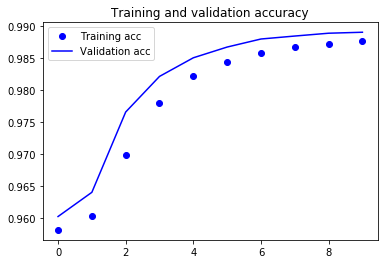

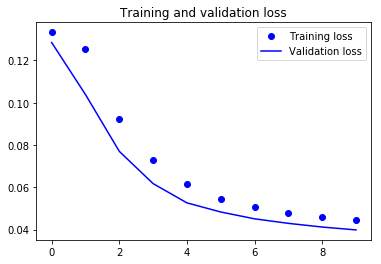

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [179]:
doc220 = fashion_trainval['title'][220]
print(doc220)

gamis jersey polos premium barokkkkahhhh


In [180]:
# test one input
input_x_220 = cleanUpSentence(doc220, stop_words)
print(input_x_220)

gamis jersey polo premium barokkkkahhhh


In [184]:
textArray = np.array(pad_sequences(input_tokenizer.texts_to_sequences([input_x_220]), maxlen=maxLength))
predicted = model.predict(textArray)[0]
print(predicted)

[6.9553200e-03 5.5050885e-05 1.4562716e-04 2.1963511e-03 1.6733508e-04
 1.3821414e-05 3.7680584e-05 3.6649834e-04 5.8313508e-05 2.2015404e-03
 9.9816740e-01 3.5719579e-04 2.0233076e-04 2.9305051e-04 8.3757201e-05
 1.1323258e-05 2.5818264e-05 3.6407229e-03 1.9539765e-04 9.9420691e-01
 6.3456400e-06 2.5273892e-04 4.8116095e-02 3.7261595e-03 1.6144679e-04
 6.3124491e-05 1.1542355e-04 1.0653065e-02 8.6073262e-05 6.1103713e-04
 1.9358032e-04 5.3616503e-05 7.3112686e-05 1.7097383e-04 4.6265307e-03
 2.9335689e-04 1.3144600e-02 3.1574228e-04 4.4404804e-03 3.3646889e-04
 1.3488942e-05 1.6869099e-05 9.8873711e-01 3.8551093e-06 2.5526358e-02
 8.9871291e-06 6.6137966e-04 8.5323962e-05 1.8096768e-04 6.4803331e-05
 2.8581450e-02 1.3358894e-04 3.9132526e-03 2.0360260e-04 5.7565910e-03
 2.4489837e-03 2.1240174e-05 4.4142855e-03 4.2413920e-04 1.7553888e-03
 2.1196110e-03 8.7057886e-04 3.5366433e-05 1.4436040e-03 9.7031385e-04
 1.2983952e-04 1.2047649e-03 2.0410993e-05 1.0086769e-04 1.8601049e-05
 3.469

In [188]:
# predicted class
for i, prob in enumerate(predicted):
    if prob > 0.5:
        print(y[i])

default
jersey
plain


In [223]:
predicted_top = y[sorted(range(len(predicted)), key=lambda i: predicted[i],reverse=True)[:3]]
if 'default' in predicted_top:
    predicted_top = [i for i in predicted_top if i is not 'default']
else:
    predicted_top = predicted_top[:2]
predicted_top

['jersey', 'plain']

In [196]:
# ground truth
fashion_trainval["Label"][220]

('plain', 'default', 'default', 'jersey', 'default')

# Make prediction for submission

In [199]:
fashion_test = pd.read_csv("fashion_data_info_val_competition.csv")
fashion_test.shape

(69498, 3)

In [200]:
fashion_test.head()

,itemid,title,image_path
0,381034175,fashion wanita cardigan drape terbuka lengan p...,new_fashion_image/9ba6bf09ae89c2b9069faf569e7a...
1,396355150,bayar di tempat fashion wanita fg sweater hood...,new_fashion_image/f465cd2e55352e3ed9ab49b16257...
2,592583745,bayar di tempat cardigan sweater model lengan ...,new_fashion_image/18d709b8be0d8385689bbf5e0ab2...
3,721929368,blazer lengan panjang slim warna polos dengan ...,new_fashion_image/5c861844f6e497f0a56b8e37138c...
4,800794259,sweater rajut longgar lengan panjang warna polos,new_fashion_image/13fbe2dcbaa567939acf708d6d8e...


In [201]:
totalX_new = []
for i, doc in enumerate(fashion_test['title']):
    totalX_new.append(cleanUpSentence(doc, stop_words))

In [202]:
totalX_new = np.array(pad_sequences(input_tokenizer.texts_to_sequences(totalX_new), maxlen=maxLength))

In [206]:
predicted_new = model.predict(totalX_new)

In [210]:
predicted_new.shape

(69498, 71)

In [ ]:
def get_attribute(data):
    return fashion_ref[fashion_ref['Attribute'] == data].dropna(axis=1, how='all').columns[0]

In [396]:
def process_prediction(data):
    predicted_ordered = y[sorted(range(len(data)), key=lambda i: data[i],reverse=True)]
    if 'default' in predicted_ordered:
        predicted_ordered = [i for i in predicted_ordered if i is not 'default']
    # get attribute of each prediction
    #predicted_attribute = [get_attribute(temp_predict) for temp_predict in predicted_ordered]
    predicted_attribute = []
    for i, temp_predict in enumerate(predicted_ordered):
        predicted_attribute.append(get_attribute(temp_predict))
    # keep top 2 for each attribute
    return_prediction = []
    for i, attr in enumerate(list(set(predicted_attribute))):
        temp_predicted_attr = [predicted_ordered[i] for i in [index for index, value in enumerate(predicted_attribute) if value == attr]]
        if len(temp_predicted_attr) > 1:
            temp_predicted_attr = temp_predicted_attr[:2]
        else:
            temp_predicted_attr = temp_predicted_attr + temp_predicted_attr
        return_prediction.append([attr]+temp_predicted_attr)
    
    return return_prediction

#predicted_new_top2 = [process_prediction(predicted_item) for predicted_item in predicted_new]
predicted_new_top2 = []
for i, predicted_item in enumerate(predicted_new):
    predicted_new_top2.append(process_prediction(predicted_item))

In [394]:
new_method = predicted_new_top2

In [395]:
new_method[2]

[['Sleeves', 'long sleeve', 'sleeve 3 4'],
 ['Collar Type', 'o neck', 'hooded'],
 ['Pattern', 'plain', 'check'],
 ['Fashion Trend', 'korean', 'sexy'],
 ['Clothing Material', 'cotton', 'polyester']]

In [397]:
predicted_new_top2[2]

[['Sleeves', 'long sleeve', 'sleeve 3 4'],
 ['Collar Type', 'o neck', 'hooded'],
 ['Pattern', 'plain', 'check'],
 ['Fashion Trend', 'korean', 'sexy'],
 ['Clothing Material', 'cotton', 'polyester']]

In [398]:
def get_ref_number(data):
    return str(int(fashion_ref[fashion_ref['Attribute'] == data].dropna(axis=1, how='all').values[0][0]))

In [399]:
# generate submission file
id_predicted = []
tagging = []
for i in range(len(predicted_new_top2)):
    tmp_id = fashion_test.itemid[i]
    tmp_id_predicted = [str(tmp_id) + "_" + str(attr_predicted[0]) for attr_predicted in predicted_new_top2[i]]
    tmp_tagging_raw = [attr_predicted[1:3] for attr_predicted in predicted_new_top2[i]]
    tmp_tagging_number = []
    for j in range(len(tmp_tagging_raw)):
        tmp_tagging_number.append(" ".join([get_ref_number(tmp) for tmp in tmp_tagging_raw[j]]))
    id_predicted.append(tmp_id_predicted)
    tagging.append(tmp_tagging_number)

In [400]:
from itertools import chain
id_predicted = list(chain.from_iterable(id_predicted))
tagging = list(chain.from_iterable(tagging))

In [401]:
d = {'id':id_predicted,'tagging':tagging}
df = pd.DataFrame(d)
df.head()

,id,tagging
0,381034175_Collar Type,3 14
1,381034175_Sleeves,3 1
2,381034175_Pattern,5 18
3,381034175_Fashion Trend,6 3
4,381034175_Clothing Material,3 7


In [402]:
df.to_csv (r'submission_fashion.csv', index = None, header=True)